In [65]:
import gym
import random
import numpy as np
import matplotlib.pyplot as plt

In [66]:
env = gym.make("Taxi-v3").env

env.seed(42)
random.seed(42)
np.random.seed(42)

In [67]:
# state = env.encode(4, 2, 3, 2) # [taxi_row, taxi_col, pasg_idx, dest_idx]
# print("State:", state)
# env.s = state # total 500=5*5*5*4. 5*5 grid; 5 passenger locations; 4 destination locations. 
# env.render()

In [82]:
qtable = np.zeros((500, 6))

episodes = 50000

# learning parameter
lr = 0.1
gamma = 0.6

# trade-off between exploration and exploitation
epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.01

# result
itr_times = np.zeros((episodes))
rewards_test = np.zeros((episodes))
rewards_train = np.zeros((episodes))

In [83]:
for epi in range(episodes):
    s = env.reset()
    rewards_sum, isDone = 0, False
    
    while not isDone:
        # exploitation or exploration?
        rdm_tradeoff = random.uniform(0, 1)
        a = np.argmax(qtable[s, :]) if rdm_tradeoff > epsilon else env.action_space.sample() ###
        
        # updata state
        new_s, reward, isDone, info = env.step(a)
        
        # get the Q-values
        qtable[s, a] = qtable[s, a] + lr * (reward + gamma * np.max(qtable[new_s, :]) - qtable[s, a])
        
        # iteration updata
        itr_times[epi] += 1
        rewards_sum += reward
        s = new_s
    
    rewards_train[epi] = rewards_sum
    
    # reduce probability of 
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episodes)

In [100]:
# testing the model
test_episodes = 1000
max_test_itr = 100

for epi in range(test_episodes):
    s = env.reset()
    rewards_sum, isDone = 0, False
    
    for i in range(max_test_itr):
#     while not isDone:
        # get the best action
        a = np.argmax(qtable[s, :])
        
        # updata state
        new_s, reward, isDone, _ = env.step(a)
        
        # iteration updata
        if isDone:
            rewards_sum += reward
            rewards_test[epi] = rewards_sum
#             print(rewards_sum)
        s = new_s
print("Average maximum score [3, 20] of 1000 episodes:", str(sum(rewards_test) / test_episodes))

Average maximum score [3, 20] of 1000 episodes: 20.0


Text(0.5, 1.0, 'Iteration times to get done for a random enviornment along the episodes.')

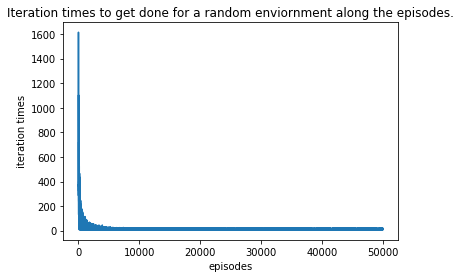

In [84]:
plt.plot(range(0,episodes), itr_times)
plt.xlabel('episodes')
plt.ylabel('iteration times')
plt.title('Iteration times to get done for a random enviornment along the episodes.')

Text(0.5, 1.0, '[Training] Reward for a random enviornment along the episodes.')

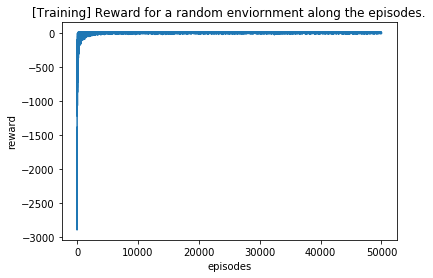

In [104]:
left, right = 0, episodes
plt.plot(range(left,right), rewards_train[left:right])
plt.xlabel('episodes')
plt.ylabel('reward')
plt.title('[Training] Reward for a random enviornment along the episodes.')

Text(0.5, 1.0, '[Testing] Reward for a random enviornment along the episodes.')

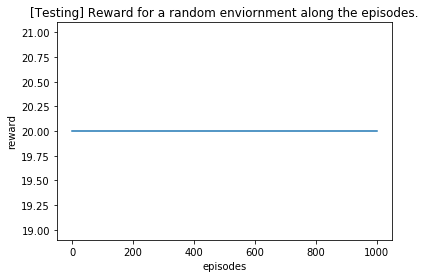

In [105]:
left, right = 0, test_episodes
plt.plot(range(left,right), rewards_test[left:right])
plt.xlabel('episodes')
plt.ylabel('reward')
plt.title('[Testing] Reward for a random enviornment along the episodes.')